#### A Linear Regression Model that predicts the final grade of a student based on their performance.

###### The performance include:  first period grade (G1), second period grade (G2) studytime, failures and absences.

###### Dataset downloaded on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Student+Performance

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## Load the data

In [2]:
raw_data = pd.read_csv("student-mat.csv", sep=";")
raw_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Clean dataset

In [3]:
data = raw_data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
data

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4
...,...,...,...,...,...,...
390,9,9,9,2,2,11
391,14,16,16,1,0,3
392,10,8,7,1,3,3
393,11,12,10,1,0,0


In [4]:
data.describe(include="all")

,G1,G2,G3,studytime,failures,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190,2.035443,0.334177,5.708861
std,3.319195,3.761505,4.581443,0.839240,0.743651,8.003096
min,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000,1.000000,0.000000,0.000000
50%,11.000000,11.000000,11.000000,2.000000,0.000000,4.000000
75%,13.000000,13.000000,14.000000,2.000000,0.000000,8.000000
max,19.000000,19.000000,20.000000,4.000000,3.000000,75.000000


## Dealing with missing values

In [5]:
data.isnull().sum()

G1           0
G2           0
G3           0
studytime    0
failures     0
absences     0
dtype: int64

### Exploring the PDFs

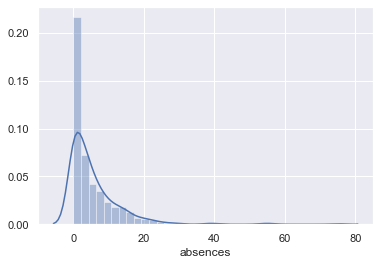

In [6]:
sns.distplot(data['absences'])

### Dealing with outliers


In [7]:
q = data['absences'].quantile(0.99)
data_1 = data[data['absences']<q]
data_1.describe(include='all')

,G1,G2,G3,studytime,failures,absences
count,391.000000,391.00000,391.000000,391.000000,391.000000,391.000000
mean,10.910486,10.71867,10.421995,2.033248,0.335038,5.191816
std,3.332769,3.77816,4.602500,0.842109,0.746118,6.053737
min,3.000000,0.00000,0.000000,1.000000,0.000000,0.000000
25%,8.000000,9.00000,8.000000,1.000000,0.000000,0.000000
50%,11.000000,11.00000,11.000000,2.000000,0.000000,4.000000
75%,13.000000,13.00000,14.000000,2.000000,0.000000,8.000000
max,19.000000,19.00000,20.000000,4.000000,3.000000,38.000000


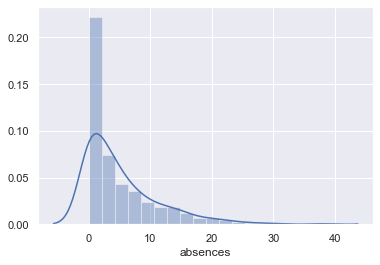

In [8]:
sns.distplot(data_1['absences'])

## Checking the OLS assumptions

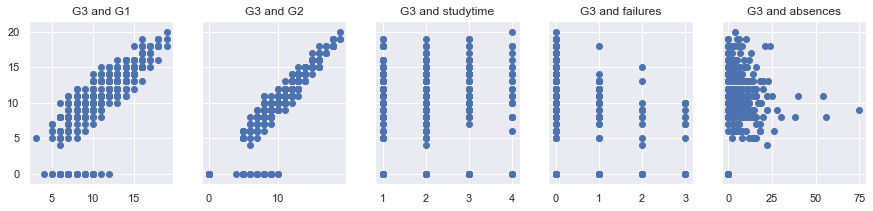

In [9]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize =(15,3)) #sharey -> share 'G3' as y
ax1.scatter(data['G1'],data['G3'])
ax1.set_title('G3 and G1')
ax2.scatter(data['G2'],data['G3'])
ax2.set_title('G3 and G2')
ax3.scatter(data['studytime'],data['G3'])
ax3.set_title('G3 and studytime')
ax4.scatter(data['failures'],data['G3'])
ax4.set_title('G3 and failures')
ax5.scatter(data['absences'],data['G3'])
ax5.set_title('G3 and absences')


plt.show()

In [10]:
data.columns.values

array(['G1', 'G2', 'G3', 'studytime', 'failures', 'absences'],
      dtype=object)

## Linear regression model


### Declare the inputs and the targets


In [11]:
targets = data['G3']
inputs = inputs = data.drop(['G3'],axis=1)

### Scale the data

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.1, random_state=365)

### Create the regression

In [15]:
reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_hat = reg.predict(x_train)

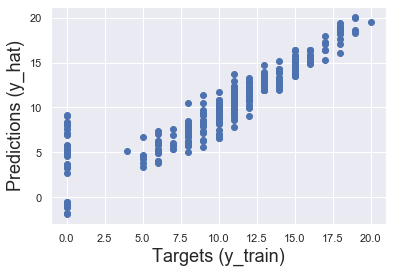

In [17]:
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.show()

In [18]:
# Find the R-squared of the model
reg.score(x_test,y_test)

0.8653515177305318

In [19]:
# The adjusted R-squared function
# The Adjusted R-squared has the appropriate measure
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [20]:
adj_r2(x_test, y_test)

0.8455502703379629

### Finding the weights and bias

In [21]:
reg.intercept_

10.385385765592403

In [22]:
reg.coef_

array([ 0.52697098,  3.71027598, -0.13714229, -0.18805587,  0.31749356])

In [23]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,G1,0.526971
1,G2,3.710276
2,studytime,-0.137142
3,failures,-0.188056
4,absences,0.317494


## Testing

In [24]:
y_hat_test = reg.predict(x_test)

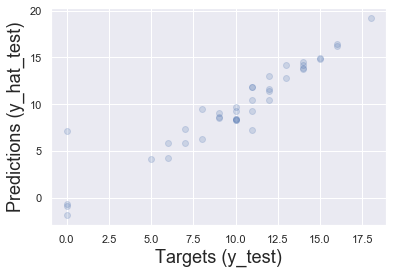

In [25]:
# Create a scatter plot with the test targets and the test predictions
# The argument 'alpha' introduces opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [26]:
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,4.267110
1,14.462593
2,13.782353
3,16.199526
4,4.143133


In [27]:
df_pf['Target'] = y_test
df_pf

,Prediction,Target
0,4.267110,NaN
1,14.462593,NaN
2,13.782353,NaN
3,16.199526,NaN
4,4.143133,NaN
5,9.047456,NaN
6,10.466537,NaN
7,13.822154,NaN
8,13.002875,NaN
9,9.721968,NaN


In [28]:
# The old indexes are preserved
# Reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0     6
1    14
2    14
3    16
4     5
Name: G3, dtype: int64

In [29]:
df_pf['Target'] = y_test
df_pf

,Prediction,Target
0,4.267110,6
1,14.462593,14
2,13.782353,14
3,16.199526,16
4,4.143133,5
5,9.047456,9
6,10.466537,12
7,13.822154,14
8,13.002875,12
9,9.721968,10


In [30]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [31]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [32]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,40.000000,40.000000,40.000000,40.000000
mean,9.680684,9.975000,0.294316,inf
std,4.676161,4.457707,1.608346,NaN
min,-1.867674,0.000000,-7.106266,0.145742
25%,7.329165,8.000000,-0.258918,2.762365
50%,9.379444,10.500000,0.330122,7.040252
75%,13.197745,13.000000,1.293934,17.376153
max,19.247433,18.000000,3.730114,inf


In [33]:
pd.options.display.max_rows = 999
# Display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
20,14.98,15,0.02,0.15
5,9.05,9,-0.05,0.53
30,14.82,15,0.18,1.21
3,16.20,16,-0.20,1.25
7,13.82,14,0.18,1.27
16,12.81,13,0.19,1.46
2,13.78,14,0.22,1.55
34,14.23,14,-0.23,1.64
24,5.85,6,0.15,2.49
25,16.43,16,-0.43,2.71
